## Task : Multimodal ML – Housing Price Prediction Using Images + Tabular Data
### Objective:Predict housing prices using both structured data and house images.

### Dataset: Housing Sales Dataset + Custom Image Dataset (House Prices and Images - SoCal)

## Instructions:
    ● Use CNNs to extract features from images
    ● Combine extracted image features with tabular data
    ● Train a model using both modalities
    ● Evaluate performance using MAE and RMSE
## Skills Gained:
    ● Multimodal machine learning
    ● Convolutional Neural Networks (CNNs)
    ● Feature fusion (image + tabular)
    ● Regression modeling and evaluation

## Loading dataset from kaggle into colab notebook

In [1]:
# Create a .kaggle directory
!mkdir -p ~/.kaggle/

# Move the uploaded kaggle.json file to the .kaggle directory
!cp kaggle.json ~/.kaggle/

# Set appropriate permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

In [2]:

# The dataset identifier is 'ted8080/house-prices-and-images-socal' from the URL.
dataset_name = "ted8080/house-prices-and-images-socal"
print(f"\nDownloading dataset: {dataset_name}...")
!kaggle datasets download -d {dataset_name}
print(f"Dataset '{dataset_name}' downloaded.")



Dataset URL: https://www.kaggle.com/datasets/ted8080/house-prices-and-images-socal
License(s): unknown
house-prices-and-images-socal.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset 'ted8080/house-prices-and-images-socal' downloaded.


In [3]:
#unzip the datsset
downloaded_zip_file = "house-prices-and-images-socal.zip"
extraction_path = "/content/socal_house_data" # Create a specific directory for cleaner organization


In [4]:

print(f"\nUnzipping {downloaded_zip_file} to {extraction_path}...")
!mkdir -p {extraction_path} # Create the extraction directory if it doesn't exist
!unzip -q {downloaded_zip_file} -d {extraction_path}
print("Dataset unzipped.")


Unzipping house-prices-and-images-socal.zip to /content/socal_house_data...
replace /content/socal_house_data/socal2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/socal_house_data/socal2/socal_pics/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/socal_house_data/socal2/socal_pics/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/socal_house_data/socal2/socal_pics/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/socal_house_data/socal2/socal_pics/100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/socal_house_data/socal2/socal_pics/1000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/socal_house_data/socal2/socal_pics/10000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Dataset unzipped.


In [5]:
# List the contents of the extracted directory to verify
print(f"\nContents of {extraction_path}:")
!ls {extraction_path}


Contents of /content/socal_house_data:
socal2	socal2.csv


In [6]:
# Now you can load your data, for example, the CSV file
# You'll need to inspect the unzipped contents to find the exact CSV filename.
# Based on the Kaggle page, it often contains 'prices.csv' and 'images' folder.
import os

try:
    import pandas as pd
    csv_file_path = os.path.join(extraction_path, 'socal2.csv') # Adjust filename if different
    if os.path.exists(csv_file_path):
        df = pd.read_csv(csv_file_path)
        print("\nSuccessfully loaded 'prices.csv' into a pandas DataFrame (first 5 rows):")
        print(df.head())
    else:
        print(f"\nWarning: '{csv_file_path}' not found. Please check the unzipped contents to locate the main data file.")
        print(f"You can view all unzipped files with: !ls -R {extraction_path}")

except Exception as e:
    print(f"\nError loading data into pandas: {e}")

print("\nKaggle dataset download and extraction complete!")


Successfully loaded 'prices.csv' into a pandas DataFrame (first 5 rows):
   image_id                 street             citi  n_citi  bed  bath  sqft  \
0         0  1317 Van Buren Avenue  Salton City, CA     317    3   2.0  1560   
1         1         124 C Street W      Brawley, CA      48    3   2.0   713   
2         2        2304 Clark Road     Imperial, CA     152    3   1.0   800   
3         3     755 Brawley Avenue      Brawley, CA      48    3   1.0  1082   
4         4  2207 R Carrillo Court     Calexico, CA      55    4   3.0  2547   

    price  
0  201900  
1  228500  
2  273950  
3  350000  
4  385100  

Kaggle dataset download and extraction complete!


In [7]:
os.path.join('/content/socal_house_data/socal2/socal_pics')

'/content/socal_house_data/socal2/socal_pics'

In [8]:
House_img_path= "/content/socal_house_data/socal2/socal_pics"

In [9]:
# getting every image address
img_data=os.listdir(House_img_path)
img_data

['13923.jpg',
 '11506.jpg',
 '4942.jpg',
 '934.jpg',
 '6651.jpg',
 '12692.jpg',
 '9819.jpg',
 '3084.jpg',
 '1717.jpg',
 '7755.jpg',
 '1537.jpg',
 '14673.jpg',
 '5945.jpg',
 '1921.jpg',
 '11566.jpg',
 '11349.jpg',
 '13656.jpg',
 '6556.jpg',
 '14730.jpg',
 '5078.jpg',
 '11548.jpg',
 '12136.jpg',
 '11206.jpg',
 '6583.jpg',
 '2204.jpg',
 '9013.jpg',
 '4182.jpg',
 '5178.jpg',
 '11184.jpg',
 '7337.jpg',
 '2939.jpg',
 '970.jpg',
 '13215.jpg',
 '11655.jpg',
 '11759.jpg',
 '3993.jpg',
 '8687.jpg',
 '1148.jpg',
 '1178.jpg',
 '11418.jpg',
 '10047.jpg',
 '3384.jpg',
 '6447.jpg',
 '9079.jpg',
 '10612.jpg',
 '14418.jpg',
 '2587.jpg',
 '5859.jpg',
 '5917.jpg',
 '11152.jpg',
 '3247.jpg',
 '1911.jpg',
 '14741.jpg',
 '5025.jpg',
 '2592.jpg',
 '6282.jpg',
 '7311.jpg',
 '9968.jpg',
 '2546.jpg',
 '10264.jpg',
 '4392.jpg',
 '7810.jpg',
 '10971.jpg',
 '6504.jpg',
 '4717.jpg',
 '2186.jpg',
 '9530.jpg',
 '8225.jpg',
 '11859.jpg',
 '6388.jpg',
 '5001.jpg',
 '9863.jpg',
 '7117.jpg',
 '2988.jpg',
 '1147.jpg',
 '1

## Lets deal with Tablur data First

In [10]:
# getting Tabluar data i.e. houses prices dataset
import pandas as pd
df=pd.read_csv("/content/socal_house_data/socal2.csv")

In [11]:
df.sample(5)

# it seems that citi is laready encoded in the column of n_citi

,image_id,street,citi,n_citi,bed,bath,sqft,price
388,388,3716 LOADSTONE Drive,"Sherman Oaks, CA",346,2,2.0,1628,995000
244,244,1804 St Anton Drive,"Pine Mountain Club, CA",282,3,2.0,1958,398500
8758,8758,495 W 25th Street,"San Bernardino, CA",318,3,1.1,2058,349900
12661,12661,1352 Pine,"El Cajon, CA",109,5,3.0,2284,749000
7774,7774,22937 Banbury Court,"Murrieta, CA",233,4,3.1,3668,869900


In [12]:
df.shape

(15474, 8)

In [13]:
df.isnull().sum()

,0
image_id,0
street,0
citi,0
n_citi,0
bed,0
bath,0
sqft,0
price,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15474 non-null  int64  
 1   street    15474 non-null  object 
 2   citi      15474 non-null  object 
 3   n_citi    15474 non-null  int64  
 4   bed       15474 non-null  int64  
 5   bath      15474 non-null  float64
 6   sqft      15474 non-null  int64  
 7   price     15474 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 967.3+ KB


In [15]:
df=df.drop(['street','citi'] , axis=1)

In [16]:
df=df.set_index('image_id')

In [17]:
df.head(2)

,n_citi,bed,bath,sqft,price
image_id,,,,,
0,317,3,2.0,1560,201900
1,48,3,2.0,713,228500


In [18]:
X=df.iloc[:,:-1]

In [19]:
y=df['price']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
X_train.shape , X_test.shape

((12379, 4), (3095, 4))

## Training with LinearRegression

In [23]:
modellr=LinearRegression()

In [24]:
modellr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_predlr=modellr.predict(X_test)

In [26]:
r2_score(y_test, y_predlr) # which is too low for LR

0.35182837326441263

## training with Random ForestRegressor

In [27]:
modelrf = RandomForestRegressor(n_estimators=100)

In [28]:
modelrf.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
modelrf.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
y_predrf =modelrf.predict(X_test)


In [31]:
y_predrf

array([1193349.98      ,  469573.8       ,  442370.99      , ...,
        662441.9       ,  623540.64      ,  388983.19604762])

In [32]:
r2_score(y_test,y_predrf)

0.6248813776186045

## Training with XGBoostregressor

In [33]:
modelxgb=XGBRegressor()

In [34]:
modelxgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
y_predxgb= modelxgb.predict(X_test)

In [36]:
r2_score(y_test, y_predxgb)

0.6383906602859497

## Concluded Report by wasid khan:
tree base algo gave ~63% + r2score becasue they can handle complex data with non linearity in data while LR cannt do this easily LR need a straight line between two competant features i.e ylabel and xlabel

But we are not going to use these model because they are still not performing too well .

**.** XGBoost and Random Forest Regressor can model complex, non-linear relationships between features and the target (price).

**.** Linear Regression assumes a straight-line (linear) relationship between input features and target.

In [37]:
import seaborn as sns

<Axes: xlabel='price', ylabel='sqft'>

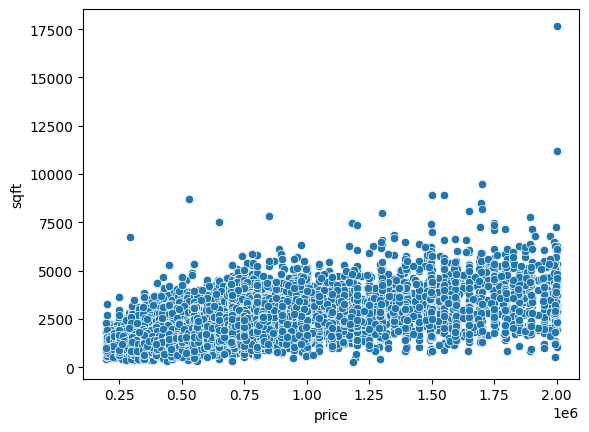

In [38]:
sns.scatterplot(y=df['sqft'] , x=df['price'] , data=df )
# thats why LR is not fit on this data

In [39]:
# Example of making a prediction with modelrf on new custom data
# Create a sample new data point as a pandas DataFrame
# The columns should match the features used for training (excluding 'price')
new_data = pd.DataFrame({
    'n_citi': [100],
    'bed': [4],
    'bath': [3.0],
    'sqft': [2500]
})

# Make a prediction using the trained RandomForestRegressor model
predicted_price = modelrf.predict(new_data)

print(f"The predicted price for the new data is: ${predicted_price[0]:,.2f}")

The predicted price for the new data is: $752,309.00


In [40]:
import numpy as np
querry=modelrf.predict(np.array([[251,5,3,3274]]))
print("$",querry)

$ [620243.88]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## WORKING WITH IMAGES DATA FOR HOUSE PRICING

## Image preprocessing

In [41]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

#df (the tabular data DataFrame) is already loaded and indexed by 'image_id'

image_data_list = []
image_ids_in_order = []

# Sort the image filenames to match the image_id index in the DataFrame
img_files = sorted(os.listdir(House_img_path), key=lambda x: int(os.path.splitext(x)[0]))

for img_file in img_files:

  # Extract image_id from the filename
  image_id = int(os.path.splitext(img_file)[0])

  # Construct the full image path
  img_path = os.path.join(House_img_path, img_file)

  # Load the image
  img = load_img(img_path, target_size=(224, 224,3)) # Resize to 224x224

  # Convert image to a numpy array
  img_array = img_to_array(img)

  # Normalize pixel values
  img_array = img_array / 255.0

  image_data_list.append(img_array)
  image_ids_in_order.append(image_id)

# Convert the list of image arrays to a numpy array
X_images = np.array(image_data_list)

In [42]:

print("Image preprocessing complete.")
print(f"Shape of image data array: {X_images.shape}")

Image preprocessing complete.
Shape of image data array: (15474, 224, 224, 3)


##  TensorFlow Model

In [43]:
from tensorflow.keras.layers import Input, Dense, Concatenate, Flatten, Conv2D, MaxPooling2D , GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Image input branch
image_input = Input(shape=(224, 224, 3), name='image_input')
x = Conv2D(32, (3,3), activation='relu')(image_input)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(256, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(512, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)

x = GlobalAveragePooling2D()(x)

# Tabular input branch
tabular_input = Input(shape=(4,), name='tabular_input')
y = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(tabular_input)
dropout = Dropout(0.5)(y)


# Concatenate
combined = Concatenate()([x, y])
z = Dense(64, activation='relu')(combined)
z= Dropout(0.5)(z)
z = Dense(1)(z)  # Predict a single value (price)
# ............. FINAL MODEL.....................
model = Model(inputs=[image_input, tabular_input], outputs=z)
model.compile(optimizer='adam', loss='huber', metrics=['mae'])

In [44]:

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 222, 222,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 111, 111,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 54, 54,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 52, 52,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 26, 26,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 24, 24,    │    147,584 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 12, 12,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 10, 10,    │    295,168 │ max_pooling2d_3[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 5, 5, 256) │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 3, 3, 512) │  1,180,160 │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 1, 1, 512) │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tabular_input       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ max_pooling2d_5[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │        640 │ tabular_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 640)       │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,757,889 (6.71 MB)

 Trainable params: 1,757,889 (6.71 MB)

 Non-trainable params: 0 (0.00 B)

### Preparing Tabular input

In [45]:
# preprocessing tabular datafor model training as an input
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
tabular_data_array= scaler.fit_transform(df[['n_citi', 'bed', 'bath', 'sqft']])
tabular_data_array

array([[ 0.89350413, -0.48936581, -0.47277095, -0.59876068],
       [-1.50038701, -0.48936581, -0.47277095, -1.42485513],
       [-0.57486776, -0.48936581, -1.51583839, -1.34000246],
       ...,
       [ 1.08038783, -0.48936581, -0.47277095, -0.58315559],
       [ 0.32395382,  0.47700052, -0.47277095, -0.08574335],
       [ 0.39514761, -1.45573214, -0.47277095, -0.93427012]])

In [46]:
df.columns

Index(['n_citi', 'bed', 'bath', 'sqft', 'price'], dtype='object')

### Preparing Image Input

In [47]:
# Convert the list of image arrays to a numpy array
X_images = np.array(image_data_list)

In [48]:
tabular_data_array.shape , X_images.shape

((15474, 4), (15474, 224, 224, 3))

### Preparing output i.e. Price

In [49]:
price_array = df['price'].values
price_array.shape

(15474,)

In [50]:
import numpy as np

X_images = np.array(X_images)
tabular_data_array = np.array(tabular_data_array)
price_array = np.array(price_array)


In [51]:
X_images = X_images.astype('float32')
tabular_data_array = tabular_data_array.astype('float32')
price_array = price_array.astype('float32')

In [52]:
from sklearn.model_selection import train_test_split

X_img_train, X_img_test, tab_train, tab_test, price_train, price_test = train_test_split(
    X_images, tabular_data_array, price_array, test_size=0.2, random_state=42)


In [53]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_mae', patience=3, restore_best_weights=True)


## Model TRAINING

In [54]:
# Final model input
model.fit(
    x={
        "image_input": X_img_train,
        "tabular_input": tab_train
    },
    y=price_train,
    validation_data=(
        {
            "image_input": X_img_test,
            "tabular_input": tab_test
        }, price_test
    ),

    epochs=15,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 381s 975ms/step - loss: 378512.6250 - mae: 378513.0312 - val_loss: 273752.6875 - val_mae: 273753.0938
Epoch 2/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 387s 1s/step - loss: 301820.1562 - mae: 301820.4375 - val_loss: 269011.5312 - val_mae: 269011.7188
Epoch 3/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 394s 1s/step - loss: 282123.6562 - mae: 282123.6562 - val_loss: 270876.6875 - val_mae: 270876.3438
Epoch 4/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 385s 996ms/step - loss: 287104.4688 - mae: 287104.0000 - val_loss: 267126.1875 - val_mae: 267125.4062
Epoch 5/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 375s 970ms/step - loss: 283681.1250 - mae: 283679.9688 - val_loss: 265561.5625 - val_mae: 265560.0312
Epoch 6/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 387s 1s/step - loss: 280895.3750 - mae: 280893.4375 - val_loss: 265344.3750 - val_mae: 265342.0625
Epoch 7/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 368s 952ms/step - loss: 284636.3438 - mae: 284633.7188 - val_loss: 264439.3750 - val_mae: 264436.0000
Epoch 8/15
387/

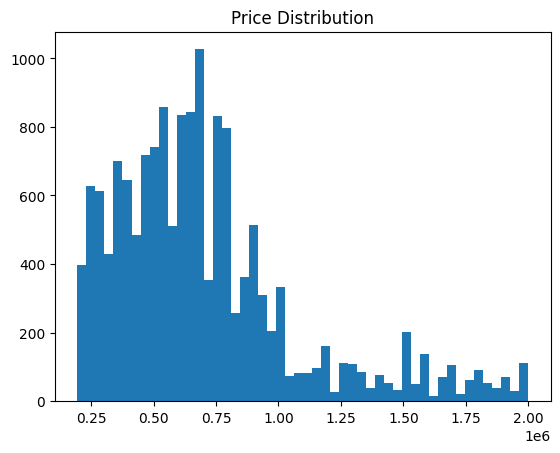

In [55]:
import matplotlib.pyplot as plt
plt.hist(price_array, bins=50)
plt.title("Price Distribution")
plt.show()


In [57]:
import numpy as np

print("Image array shape:", X_images.shape)
print("Tabular data shape:", tabular_data_array.shape)
print("Price array shape:", price_array.shape)


Image array shape: (15474, 224, 224, 3)
Tabular data shape: (15474, 4)
Price array shape: (15474,)


##  Make Predictions on New Image + Data

In [58]:
IMG_SIZE = (224, 224,3)

def process_image(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)
    img = img_to_array(img)
    img = img / 255.0  # Normalize to [0,1]
    return img


In [61]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd # Import pandas to create DataFrame for scaler

# Upload the image file
uploaded = files.upload()

Saving 10041.jpg to 10041.jpg


In [62]:
# Assuming only one file is uploaded
for filename in uploaded.keys():
  img_path = filename
  print(f"Uploaded file: {img_path}")

  # Process the uploaded image
  try:
    test_img = process_image(img_path)
    test_img = np.expand_dims(test_img, axis=0)

    # Get tabular input from the user
    print("\nPlease enter the tabular data for the house:")
    n_citi = int(input("Enter n_citi: "))
    bed = int(input("Enter number of bedrooms: "))
    bath = float(input("Enter number of bathrooms: "))
    sqft = int(input("Enter square footage: "))

    # Create a DataFrame for the scaler to work correctly
    test_tab = pd.DataFrame([[n_citi, bed, bath, sqft]], columns=['n_citi', 'bed', 'bath', 'sqft'])

    # Scale the tabular data using the fitted scaler
    test_tab_scaled = scaler.transform(test_tab)

    # Make prediction using the multimodal model
    predicted_price = model.predict({
        "image_input": test_img,
        "tabular_input": test_tab_scaled
    })

    print(f"\nPredicted Price: ${predicted_price[0][0]:,.2f}")

  except Exception as e:
    print(f"An error occurred: {e}")

Uploaded file: 10041.jpg

Please enter the tabular data for the house:
Enter n_citi: 78
Enter number of bedrooms: 4
Enter number of bathrooms: 2
Enter square footage: 1901
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Predicted Price: $580,207.69


## by here user can upload the house image and input the specific required features for houses , it will give you the new predicted price although the price might be vary with th eactual price ,but upto here the model is functionally working